## Library

In [ ]:
# import the library

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import math
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras import layers

In [ ]:
# remove dataset in a new run (if already run the 'git clone' code only) 
# ignore if no CycleMe folder in Colab Files

try:
    !rm -rf '/content/CycleMe'
    print("previous directory is removed successfully")
except OSError as error:
    print(error)
    print("File is empty, can not be removed!")

previous directory is removed successfully


## Data Gathering

In [ ]:
# clone data from github

!git clone https://github.com/notRobot200/CycleMe.git

Cloning into 'CycleMe'...
remote: Enumerating objects: 6609, done.
remote: Counting objects: 100% (868/868), done.
remote: Compressing objects: 100% (850/850), done.
remote: Total 6609 (delta 24), reused 854 (delta 17), pack-reused 5741
Receiving objects: 100% (6609/6609), 240.82 MiB | 32.63 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [ ]:
# specify the directory

dir = '/content/CycleMe/CycleMeDataset'

In [ ]:
# display the number of images on each class

classes = ['Aluminium', 'Carton', 'Glass', 'Organic Waste', 'Paper and Cardboard', 'Plastic', 'Styrofoam', 'Textiles']
numData = 0
for label in classes:
    directory = os.path.join(dir, label)
    lengthDir = len(os.listdir(directory))
    print("Images of label \"" + label + "\":\t",lengthDir )
    numData = numData + lengthDir
print('Total images : \t',numData)

Images of label "Aluminium":	 607
Images of label "Carton":	 336
Images of label "Glass":	 597
Images of label "Organic Waste":	 562
Images of label "Paper and Cardboard":	 602
Images of label "Plastic":	 596
Images of label "Styrofoam":	 395
Images of label "Textiles":	 585
Total images : 	 4280


In [ ]:
# investigating unsupported image file

from pathlib import Path
import imghdr

DIR = '/content/CycleMe/CycleMeDataset'
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(DIR).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

/content/CycleMe/CycleMeDataset/Glass/glass (11).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (10).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (356).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (14).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (7).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (13).jpg is not an image
/content/CycleMe/CycleMeDataset/Glass/glass (336).jpg is not an image
/content/CycleMe/CycleMeDataset/Aluminium/alum (290).jpg is not an image
/content/CycleMe/CycleMeDataset/Aluminium/alum (271).jpg is not an image
/content/CycleMe/CycleMeDataset/Plastic/plast (12).jpg is not an image
/content/CycleMe/CycleMeDataset/Organic Waste/org (183).jpg is not an image
/content/CycleMe/CycleMeDataset/Organic Waste/org (22).jpg is not an image
/content/CycleMe/CycleMeDataset/Styrofoam/STYROFOAM (10).jpg is a webp, not accepted by TensorFlow
/content/CycleMe/CycleMeDataset/Styrofoam/STYROFO

In [ ]:
# delete unsupported image file (the bad encoded one)

img_link=list(Path(DIR).glob(r'**/*.jpg'))
count_num=0
for lnk in img_link:
    binary_img=open(lnk,'rb')
    find_img=tf.compat.as_bytes('JFIF') in binary_img.peek(10) #The JFIF is a JPEG File Interchange Format (JFIF). It is a standard which we gauge if an image is corrupt or substandard
    if not find_img:
        count_num+=1
        os.remove(str(lnk))
print('Total %d pcs image delete from Dataset' % count_num)

Total 79 pcs image delete from Dataset


In [ ]:
# display the number of images per class after cleaning

numData = 0
for label in classes:
    directory = os.path.join(dir, label)
    lengthDir = len(os.listdir(directory))
    print("Images of label \"" + label + "\":\t",lengthDir )
    numData = numData + lengthDir
print('Total images : \t',numData)

Images of label "Aluminium":	 598
Images of label "Carton":	 323
Images of label "Glass":	 585
Images of label "Organic Waste":	 542
Images of label "Paper and Cardboard":	 601
Images of label "Plastic":	 593
Images of label "Styrofoam":	 385
Images of label "Textiles":	 574
Total images : 	 4201


In [ ]:
# load image shape of first example in each class

for label in classes:
    directory = os.path.join(dir, label)
    sample_image  = load_img(f"{os.path.join(directory, os.listdir(directory)[0])}")
    # convert the image into its numpy array representation
    sample_array = img_to_array(sample_image)
    print("Class: ", label, "\t\t", f"Each image has shape: {sample_array.shape}")

Class:  Aluminium 		 Each image has shape: (259, 194, 3)
Class:  Carton 		 Each image has shape: (183, 275, 3)
Class:  Glass 		 Each image has shape: (177, 285, 3)
Class:  Organic Waste 		 Each image has shape: (181, 279, 3)
Class:  Paper and Cardboard 		 Each image has shape: (384, 512, 3)
Class:  Plastic 		 Each image has shape: (384, 512, 3)
Class:  Styrofoam 		 Each image has shape: (225, 225, 3)
Class:  Textiles 		 Each image has shape: (233, 216, 3)


In [ ]:
# load data

# split data
train = tf.keras.preprocessing.image_dataset_from_directory(dir, validation_split=0.1, subset="training", seed=42, batch_size=128, smart_resize=True, image_size=(256, 256))
test = tf.keras.preprocessing.image_dataset_from_directory(dir, validation_split=0.1, subset="validation", seed=42, batch_size=128, smart_resize=True, image_size=(256, 256))

# define the class
classes = train.class_names
numClasses = len(train.class_names)
print(classes)

# to find a good allocation of its CPU budget across all parameters 
AUTOTUNE = tf.data.AUTOTUNE
train = train.prefetch(buffer_size=AUTOTUNE)
test = train.prefetch(buffer_size=AUTOTUNE)

Found 4201 files belonging to 8 classes.
Using 3781 files for training.
Found 4201 files belonging to 8 classes.
Using 420 files for validation.
['Aluminium', 'Carton', 'Glass', 'Organic Waste', 'Paper and Cardboard', 'Plastic', 'Styrofoam', 'Textiles']


## Create The Model

In [ ]:
# import MobileNetV2

from tensorflow.keras.applications import MobileNetV2

In [ ]:
# download the weights

!wget --no-check-certificate \
    https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5 \
    -O /tmp/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5

--2023-05-27 06:34:05--  https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9406464 (9.0M) [application/octet-stream]
Saving to: ‘/tmp/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5’

/tmp/mobilenet_v2_w 100%[===================>]   8.97M  --.-KB/s    in 0.04s   

2023-05-27 06:34:05 (233 MB/s) - ‘/tmp/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5’ saved [9406464/9406464]



In [ ]:
# specify the weight

local_weights_file = '/tmp/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5'

In [ ]:
# create pre trained model
pre_trained_model = MobileNetV2(input_shape = (256, 256, 3),
                                  include_top = False, 
                                  weights = 'imagenet',
                                  classes=8)

pre_trained_model.load_weights(local_weights_file)

# specify the non trainable layers
for layer in pre_trained_model.layers[:-3]: 
    layer.trainable = False

# print the model summary
pre_trained_model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                

In [ ]:
# display total parameter in the model

total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 2,257,984 total parameters in this model.
There are 412,160 trainable parameters in this model.


In [ ]:
# specify the last_output layer

last_desired_layer = pre_trained_model.layers[-1]
print('last layer output shape: ', last_desired_layer.output_shape)
last_output = last_desired_layer.output
print('last layer output: ', last_output)

last layer output shape:  (None, 8, 8, 1280)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 8, 8, 1280), dtype=tf.float32, name=None), name='out_relu/Relu6:0', description="created by layer 'out_relu'")


In [ ]:
# create_final_model

def create_final_model(pre_trained_model, last_output):

  x = layers.Dropout(0.3)(last_output) 
  x = layers.GlobalAveragePooling2D()(x) 
  x = layers.BatchNormalization()(x) 
  x = layers.Dense(200, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.02))(x)     
  x = layers.Dropout(0.3)(x)  
  x = layers.Dense(8, activation='softmax')(x)        

  # create the complete model by using the Model class
  model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

  # compile the model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0012), 
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model

In [ ]:
# save the model in a variable
model = create_final_model(pre_trained_model, last_output)

# inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 2,520,912 total parameters in this model.
There are 672,528 trainable parameters in this model.


In [ ]:
epochs = 20
lrCallback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 30))
stepDecay = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.1 * 0.1**math.floor(epoch / 6))
history = model.fit(train,
                    validation_data = test,
                    epochs = epochs,
                    verbose = 2,
                    callbacks=[]) 

Epoch 1/20
30/30 - 41s - loss: 97.0720 - accuracy: 0.5308 - val_loss: 39.6608 - val_accuracy: 0.5292 - 41s/epoch - 1s/step
Epoch 2/20
30/30 - 26s - loss: 16.5481 - accuracy: 0.6287 - val_loss: 6.1720 - val_accuracy: 0.4753 - 26s/epoch - 850ms/step
Epoch 3/20
30/30 - 27s - loss: 4.0206 - accuracy: 0.5789 - val_loss: 3.1854 - val_accuracy: 0.5115 - 27s/epoch - 898ms/step
Epoch 4/20
30/30 - 26s - loss: 2.9431 - accuracy: 0.5789 - val_loss: 2.9295 - val_accuracy: 0.5615 - 26s/epoch - 857ms/step
Epoch 5/20
30/30 - 33s - loss: 2.7914 - accuracy: 0.6014 - val_loss: 2.8431 - val_accuracy: 0.5827 - 33s/epoch - 1s/step
Epoch 6/20
30/30 - 32s - loss: 2.7350 - accuracy: 0.6205 - val_loss: 2.7434 - val_accuracy: 0.6181 - 32s/epoch - 1s/step
Epoch 7/20
30/30 - 34s - loss: 2.6639 - accuracy: 0.6440 - val_loss: 2.7751 - val_accuracy: 0.6054 - 34s/epoch - 1s/step
Epoch 8/20
30/30 - 30s - loss: 2.6436 - accuracy: 0.6562 - val_loss: 2.6787 - val_accuracy: 0.6078 - 30s/epoch - 996ms/step
Epoch 9/20
30/30 

In [ ]:
model.save("/content/modelMobileNetV2.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                                )                                                             

## Model Evaluation

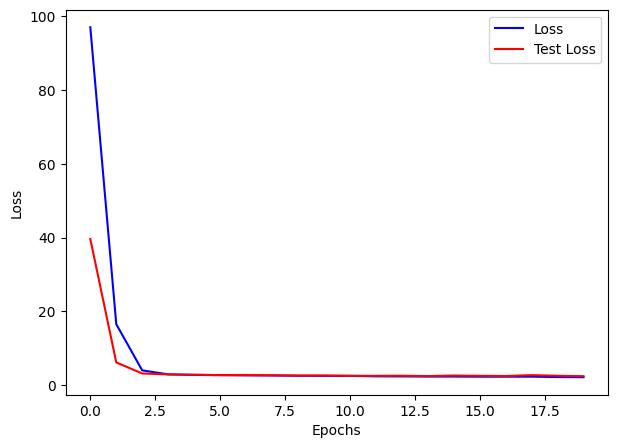

In [ ]:
# loss plot

plt.figure(figsize=(7,5)) # (x,y)
plt.plot(range(0, epochs), history.history["loss"], color="b", label="Loss")
plt.plot(range(0, epochs), history.history["val_loss"], color="r", label="Test Loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

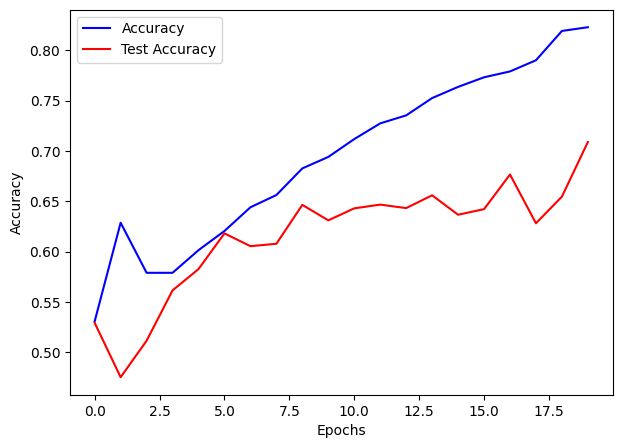

In [ ]:
# accuracy plot

plt.figure(figsize=(7,5)) # (x,y)
plt.plot(range(0, epochs), history.history["accuracy"], color="b", label="Accuracy")
plt.plot(range(0, epochs), history.history["val_accuracy"], color="r", label="Test Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Text(0, 0.5, 'Loss')

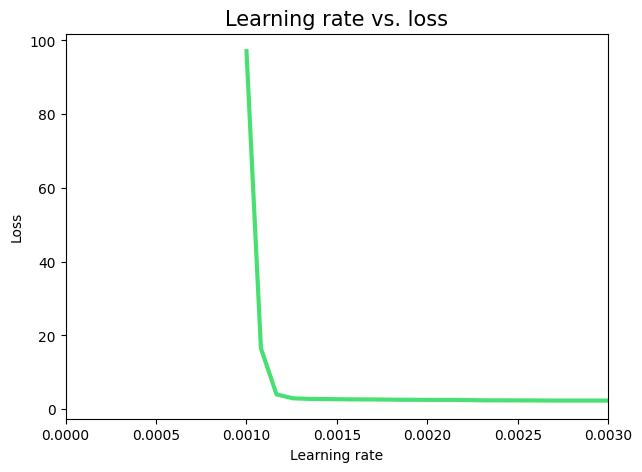

In [ ]:
# learning rate vs. los plot

plt.figure(figsize=(7,5)) # (x,y)
plt.xlim([0, 0.003])
learning_rates = 1e-3 * (10 ** (np.arange(epochs) / 30))
plt.plot(learning_rates, history.history['loss'], lw=3, color='#48e073')
plt.title('Learning rate vs. loss', size=15)
plt.xlabel('Learning rate')
plt.ylabel('Loss')

1/1 [==============================] - 1s 1s/step
[12.950214   26.58424    15.841863    0.21060975  8.417286   27.203539
  5.7885523   3.0036948 ] 
 ['Aluminium', 'Carton', 'Glass', 'Organic Waste', 'Paper and Cardboard', 'Plastic', 'Styrofoam', 'Textiles']
Prediction:  Plastic 27.20353901386261%


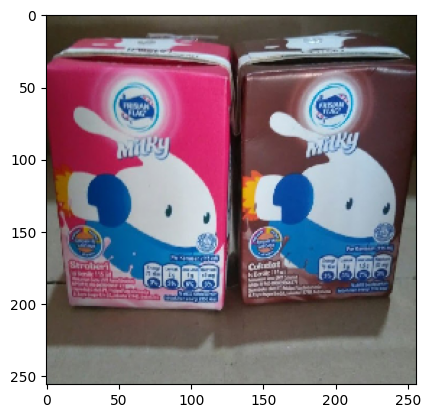

In [ ]:
# try the image prediction

import requests

# plastic 
# img_data = requests.get("https://images.unsplash.com/photo-1591872203534-278fc084969e?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1064&q=80").content

# styrofoam 
# img_data = requests.get('https://www.asiaone.com/sites/default/files/original_images/May2016/20160510-NAFA-STYROFOAM-BOXES.jpg').content

# carton 
img_data = requests.get('https://lh6.googleusercontent.com/proxy/F-ZBe3pl0OfndrhadlTVO08-thBk3y0zEv6q90T1KhOV0a5YLsRSwvhNF-Dsgb-qzJwuKel6aJD5Ptpxj1UfbZvrN0g5mfVCiq9MlNdqyZaunE5jeAnuJEVoB8d8RB4MLAgCtCZp2vfjdooB_NMpEcLpThhNRw-GUCm3hEQgt9o7XbH6FUAONznkY1L7QwkLkrhnOuxtZPUxRYU=w1200-h630-p-k-no-nu').content


with open('img.jpg', 'wb') as handler:
    handler.write(img_data)

path = "/content/img.jpg"

img = tf.keras.preprocessing.image.load_img(path, target_size=(256, 256))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)

plt.imshow(img)
print(predictions[0]*100, "\n", classes)
print("Prediction: ", classes[np.argmax(predictions)], f"{predictions[0][np.argmax(predictions)]*100}%")

In [ ]:
# move file txt to outside the dataset folder

file_source2 = '/content/CycleMe/CycleMeDataset/'
file_destination2 = '/content/CycleMe/'

get_files2 = os.listdir(file_source2)
shutil.move(file_source2 + 'problem_1.txt', file_destination2)

'/content/CycleMe/problem_1.txt'

In [ ]:
# create function to display confusion matrix plot

def plot_confusion_matrix(cm, target_names, cmap=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=80)
        plt.yticks(tick_marks, target_names)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}%; misclass={:0.4f}%'.format(accuracy, misclass))
    plt.show()

plt.figure(figsize=(10, 10))
true = []
predictions = []

"""
for images, labels in test_dataset.take(50):
  pred = model.predict(images)
  for i in range(32):
    try:
      ax = plt.subplot(4, 8, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      #print(classes[np.argmax(pred[i])], 100 * np.max(pred[i]), "real = " + str(classes[labels[i]]))

      true.append(labels[i])
      predictions.append(np.argmax(pred[i]))

      plt.title(classes[labels[i]])
      plt.axis("off")
    except:
      print()

"""

for i in os.listdir(DIR):
  folderPath = os.path.join(DIR, i)
  for j in os.listdir(folderPath)[:550]:
    fullPath = os.path.join(folderPath, j)
    try:
      img = tf.keras.preprocessing.image.load_img(fullPath, target_size=(256, 256))
      img_array = tf.keras.preprocessing.image.img_to_array(img)
      img_array = tf.expand_dims(img_array, 0) 

      preds = model.predict(img_array)
      true.append(classes.index(i))
      predictions.append(np.argmax(preds))
    except:
      print("Error on image:", fullPath)

1/1 [==============================] - 0s 26ms/step


<Figure size 1000x1000 with 0 Axes>

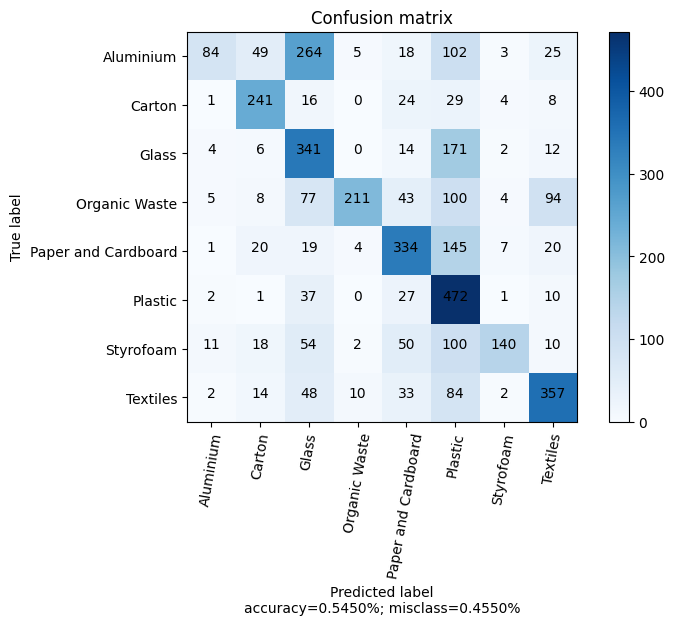

In [ ]:
# display confusion matrix plot

plot_confusion_matrix(tf.math.confusion_matrix(true, predictions), classes)